In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [126]:
dataset_cols = ["instant", "dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit",
                "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
df = pd.read_csv("/workspace/Machine-Learning-Studies/Supervise Learning/datasets/day.csv").drop(["hum","windspeed","instant","atemp","weathersit","dteday","casual","registered","season","yr","holiday","weekday","workingday"], axis=1)

In [127]:
df.head()

,mnth,temp,cnt
0,1,0.344167,985
1,1,0.363478,801
2,1,0.196364,1349
3,1,0.200000,1562
4,1,0.226957,1600


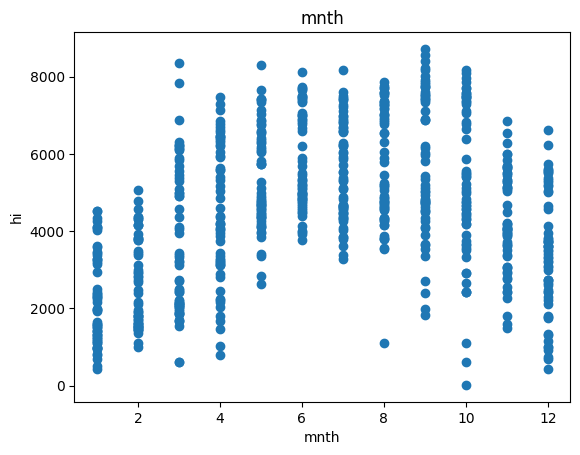

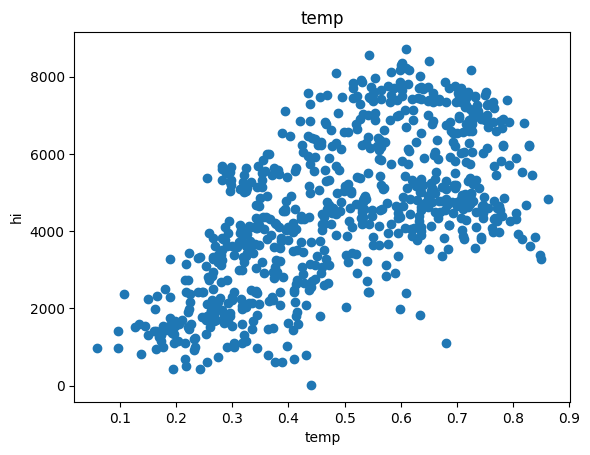

In [128]:
for label in df.columns[:-1]:
  plt.scatter(df[label], df["cnt"])
  plt.title(label)
  plt.ylabel("hi")
  plt.xlabel(label)
  plt.show()

In [129]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [130]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [131]:
_, X_train_temp, y_train_temp = get_xy(train, "cnt", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "cnt", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "cnt", x_labels=["temp"])

In [132]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [133]:
temp_reg.score(X_test_temp, y_test_temp)

0.42955371688606314

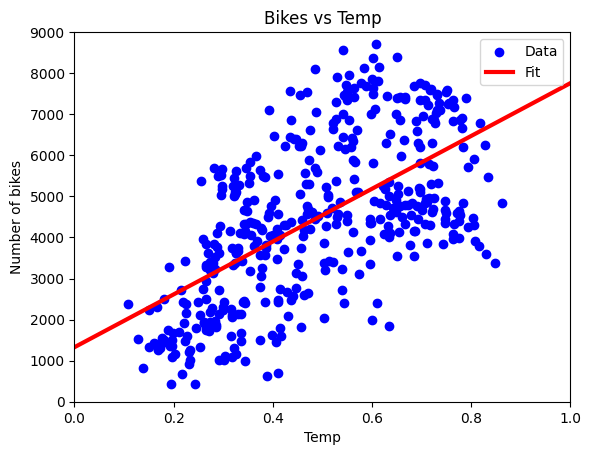

In [134]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.ylim(0, 9000)
plt.xlim(0,1)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [122]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "cnt", x_labels=df.columns[:-1])
_, X_val_all, y_val_all = get_xy(val, "cnt", x_labels=df.columns[:-1])
_, X_test_all, y_test_all = get_xy(test, "cnt", x_labels=df.columns[:-1])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [123]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [124]:
all_reg.score(X_test_all, y_test_all)

0.43625824334703533